In [204]:
#importamos librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")


In [205]:
from sklearn.model_selection import train_test_split as tts

In [206]:
!pip install openpyxl

Importamos CSV

In [207]:
a = pd.read_csv("measurements.csv")

In [208]:
a.shape

(388, 12)

In [209]:
B = pd.read_excel("measurements2.xlsx")

In [210]:
B.shape

(388, 12)

In [211]:
# vemos q los dos datasets tienen la misma info, nos quedamos con a

In [212]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [213]:
c = a.drop(["specials","refill liters","refill gas"], axis=1 )

In [214]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   376 non-null    object
 4   temp_outside  388 non-null    int64 
 5   gas_type      388 non-null    object
 6   AC            388 non-null    int64 
 7   rain          388 non-null    int64 
 8   sun           388 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 27.4+ KB


In [215]:
c.head(2)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0


In [216]:
c.gas_type.unique()

array(['E10', 'SP98'], dtype=object)

In [217]:
c.distance.unique()

array(['28', '12', '11,2', '12,9', '18,5', '8,3', '7,8', '12,3', '4,9',
       '11,9', '12,4', '11,8', '24,7', '17,3', '33,4', '25,9', '25,3',
       '14,2', '17,9', '18,4', '18,3', '32,6', '19', '12,1', '20', '4,5',
       '11,7', '10,2', '5,4', '2', '16', '27,3', '10,6', '11,6', '13,1',
       '6,1', '153,5', '2,9', '2,1', '9,8', '6,8', '14', '13,9', '9,7',
       '24,8', '34,8', '5,2', '10,5', '13,2', '13', '12,2', '12,5',
       '15,7', '6,4', '5,3', '26,2', '18,8', '22,9', '162,7', '16,6',
       '15,9', '5,1', '22,4', '31,1', '16,1', '4,2', '17,4', '23,5', '7',
       '20,1', '20,8', '1,7', '35,9', '36,9', '16,8', '9,9', '36,6',
       '44,9', '21,6', '39,4', '26,6', '53,2', '18,9', '43,5', '16,4',
       '21,1', '22,7', '44,4', '35,8', '40,6', '14,1', '58,7', '16,2',
       '31,8', '51,6', '38,6', '81,2', '130,3', '67,2', '43,7', '56,1',
       '39', '38,5', '28,2', '19,6', '22,2', '13,6', '12,6', '8,7', '7,9',
       '2,4', '18,1', '1,3', '13,4', '12,8', '29', '31,4', '27,1', '

In [218]:
def numer(x):
    x = x.replace(",", ".")
    return x

In [219]:
c.distance = c.distance.apply(numer)

In [220]:
c.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,11.2,"5,5",38,"21,5",15,E10,0,0,0
3,12.9,"3,9",36,"21,5",14,E10,0,0,0
4,18.5,"4,5",46,"21,5",15,E10,0,0,0


In [221]:
c.consume.unique()

array(['5', '4,2', '5,5', '3,9', '4,5', '6,4', '4,4', '5,3', '5,6', '4,6',
       '5,9', '5,1', '4,7', '4,9', '5,7', '4,1', '5,8', '4,8', '4,3',
       '5,2', '7,4', '6,5', '4', '3,3', '9,9', '6,1', '6,2', '7,9',
       '12,2', '5,4', '3,6', '6,9', '8,7', '6,3', '6', '10,8', '8,1',
       '7,1', '3,8', '9', '3,7', '11,5', '6,6'], dtype=object)

In [222]:
c.consume = c.consume.apply(numer)

In [223]:
c.speed.unique()

array([26, 30, 38, 36, 46, 50, 43, 40, 42, 59, 58, 24, 32, 39, 37, 62, 57,
       21, 28, 29, 35, 51, 23, 55, 44, 25, 63, 61, 82, 52, 18, 41, 20, 56,
       45, 22, 60, 33, 34, 71, 75, 66, 27, 49, 14, 80, 53, 47, 73, 69, 85,
       67, 54, 31, 48, 16, 88, 65, 90, 87])

In [224]:
c.temp_inside.unique()

array(['21,5', '22,5', '20', nan, '21', '20,5', '23', '23,5', '25', '24',
       '22', '19', '24,5', '25,5'], dtype=object)

In [225]:
c.temp_inside.fillna("0,0", inplace = True)

In [226]:
c.temp_inside = c.temp_inside.apply(numer)

In [227]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   388 non-null    object
 4   temp_outside  388 non-null    int64 
 5   gas_type      388 non-null    object
 6   AC            388 non-null    int64 
 7   rain          388 non-null    int64 
 8   sun           388 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 27.4+ KB


In [228]:
c.temp_outside.unique()

array([12, 13, 15, 14, 10, 11,  6,  4,  9,  0,  5,  3,  8,  1,  2,  7, -3,
       17, 18, -5, 16, 19, 21, 20, 25, 23, 27, 24, 26, 22, 30, 31, 28])

In [229]:
c.AC.unique()

array([0, 1])

In [230]:
c.sun.unique()

array([0, 1])

In [231]:
c.rain.unique()

array([0, 1])

In [232]:
c.AC.value_counts()

0    358
1     30
Name: AC, dtype: int64

In [233]:
c.sun.value_counts()

0    356
1     32
Name: sun, dtype: int64

In [234]:
c.rain.value_counts()

0    340
1     48
Name: rain, dtype: int64

In [235]:
def flooat(x):
    x = float(x)
    return x

In [236]:
c.distance = c.distance.apply(flooat)

In [237]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    object 
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    object 
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 27.4+ KB


In [238]:
c.consume = c.distance.apply(flooat)
c.temp_inside = c.temp_inside.apply(flooat)

In [239]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [240]:
c.to_csv("limpio.csv", index=False)

In [241]:
corr = c.corr()
corr

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
distance,1.000000,1.000000,0.562299,0.053597,0.088175,-0.025738,-0.019791,0.081120
consume,1.000000,1.000000,0.562299,0.053597,0.088175,-0.025738,-0.019791,0.081120
speed,0.562299,0.562299,1.000000,0.026817,0.015411,-0.035408,0.009489,0.081618
temp_inside,0.053597,0.053597,0.026817,1.000000,0.077181,0.125307,0.011845,0.060782
temp_outside,0.088175,0.088175,0.015411,0.077181,1.000000,0.167562,-0.186315,0.346903
AC,-0.025738,-0.025738,-0.035408,0.125307,0.167562,1.000000,0.242915,0.088598
rain,-0.019791,-0.019791,0.009489,0.011845,-0.186315,0.242915,1.000000,-0.112650
sun,0.081120,0.081120,0.081618,0.060782,0.346903,0.088598,-0.112650,1.000000


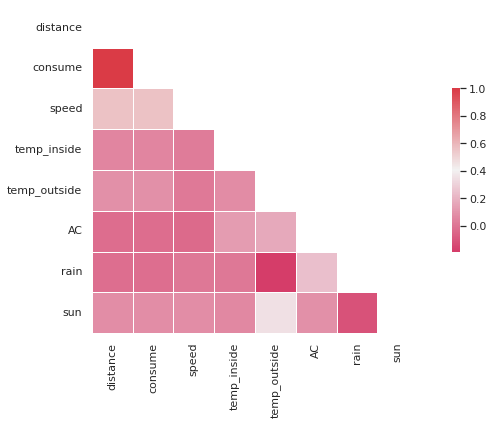

In [242]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,  
            mask = mascara,
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5} #barra lateral
);

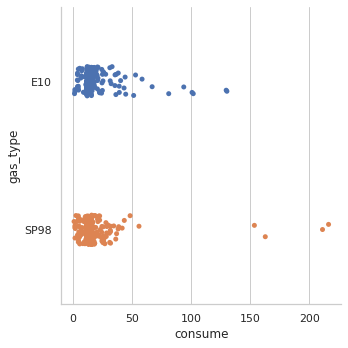

In [243]:
sns.catplot(data=c, x="consume", y="gas_type");

In [244]:
e = c.copy() 

In [245]:
dic_para_gas = {'E10':0,
                  'SP98':1}


In [246]:
e.gas_type = e.gas_type.map(dic_para_gas)

In [247]:
e.gas_type.unique()

array([0, 1])

In [248]:
e.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'gas_type', 'AC', 'rain', 'sun'],
      dtype='object')

In [249]:
consumo = e.copy()

In [250]:
consumo.drop(['distance', 'speed', 'temp_inside', 'temp_outside',
       'gas_type', 'AC', 'rain', 'sun'], axis = 1, inplace= True)

In [251]:
y = consumo

In [252]:
y

,consume
0,28.0
1,12.0
2,11.2
3,12.9
4,18.5
...,...
383,16.0
384,16.1
385,16.0
386,15.4


In [253]:
X = e.copy()

In [254]:
X.drop('consume', axis = 1, inplace = True)

In [255]:
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2)

In [264]:
from sklearn.linear_model import Ridge, Lasso

from sklearn.linear_model import SGDRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

from sklearn import metrics
import numpy as np

In [261]:
models={
    'ridge': Ridge(),
    'lasso': Lasso(),
    'sgd': SGDRegressor(),
    'knn': KNeighborsRegressor(),
    'grad': GradientBoostingRegressor(),
}

In [262]:
for name, model in models.items():
    print("ENTRENANDO: ", name)
    model.fit(X_train, y_train)

ENTRENANDO:  ridge
ENTRENANDO:  lasso
ENTRENANDO:  sgd
ENTRENANDO:  knn
ENTRENANDO:  grad


/home/mariadelas/anaconda3/envs/ironhack/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mariadelas/anaconda3/envs/ironhack/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [265]:
#Podemos seguir el mismo proceso para realizar predicciones de cada algoritmo y sacar métricas
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"------{name}------")
    print('MAE - ', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE - ', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2 - ', metrics.r2_score(y_test, y_pred))

------ridge------
MAE -  0.00011603846226233162
MSE -  4.354098456616113e-08
RMSE -  0.0002086647659911973
R2 -  0.9999999999239537
------lasso------
MAE -  0.019422382064645957
MSE -  0.0023160609414599785
RMSE -  0.04812547081806035
R2 -  0.9999959548931695
------sgd------
MAE -  1527683060848.7036
MSE -  3.620144746048999e+24
RMSE -  1902667797080.9827
R2 -  -6.322749102739901e+21
------knn------
MAE -  2.288205128205129
MSE -  48.865517948717944
RMSE -  6.990387539236859
R2 -  0.9146541280973977
------grad------
MAE -  0.22351108948729673
MSE -  0.46454585304117485
RMSE -  0.6815760067968758
R2 -  0.9991886493271566
